In [21]:
%%javascript 
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [59]:
%autoreload 2
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [23]:
from __future__ import print_function
import pandas as pd
import h5py
import sys
sys.path.append("../")
import extract_catalog as ec
import get_DM_centroids as getDM
import get_gal_centroids as getgal
import seaborn as sns

In [24]:
import compute_distance as compDist
import plot_DM_prop as plotDM
import plot_gal_prop as plotgal

In [25]:
sns.set_style('white')

In [29]:
data_path = "../../data/test_results/"

In [27]:
# main datafile
main_h5 = h5py.File(
    data_path + 
    "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5", 
    "r")

total_clstNo = 43
date_stamp = '05_23_16'

# load the data

In [30]:
DM_fhats = \
    h5py.File(
        data_path + "test_DM_fhat_clst{0}_{1}.h5".format(
            total_clstNo, date_stamp), 'r')
    

star_fhats = \
    h5py.File(
        data_path + "test_stars_fhat_clst{0}_{1}.h5".format(
            total_clstNo, date_stamp), 'r')

# figure out how the centroids and the shrinking aperture worked

In [31]:
star_fhat_path_lists = compDist.retrieve_cluster_path(star_fhats)
star_fhat = star_fhats[star_fhat_path_lists[0]]

In [32]:
clstNo_list = np.unique([int(p.split('/')[0]) 
                         for p in star_fhat_path_lists]
                       )

In [33]:
R200C = main_h5["Group"]['Group_R_Crit200'][:clstNo_list[-1] + 1]

# we have 2 sets of DM density estimates 

this is due to two different kernel smoothing size

In [34]:
DM_fhat_path = []
DM_fhats.visit(DM_fhat_path.append)

In [35]:
star_fhat_path = []
star_fhat.visit(star_fhat_path.append)

In [36]:
DM_path_list = \
    compDist.retrieve_cluster_path(DM_fhats)

# Visualize the smoothed and not smoothed histograms

In [117]:
ylabels = ax3.get_yticks().tolist()

In [119]:
type(ylabels[0])

float

eigval [ 81561.46849299  22712.3630053 ] 
 eigvec are [[ 0.91388708 -0.40596848]
 [ 0.40596848  0.91388708]]
matrix is [[ 71862.52345817  21833.56829941]
 [ 21833.56829941  32411.30804012]]
width: 571.179371102, height: 301.412428445, angle 23.9518313568
centers =  3143.23094335 -1857.6412578


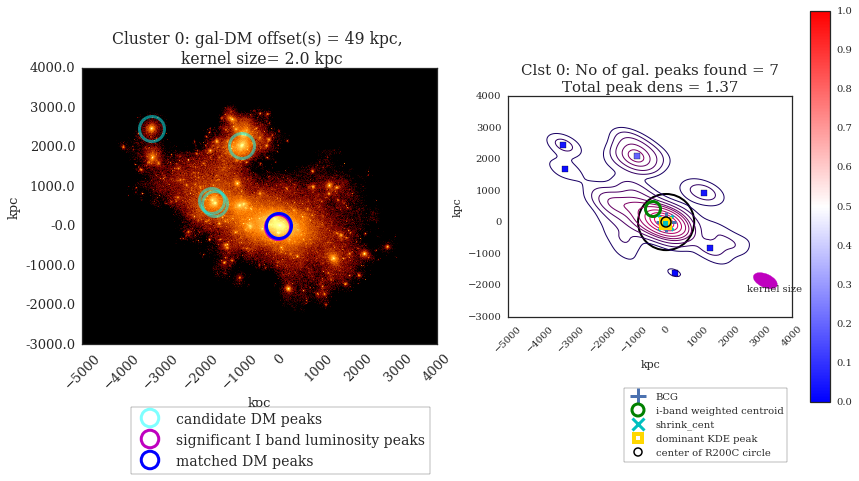

eigval [ 72633.11068347  35957.87613903] 
 eigvec are [[ 0.60563365 -0.7957436 ]
 [-0.7957436  -0.60563365]]
matrix is [[ 49410.06301234  17674.86285774]
 [ 17674.86285774  59180.92381017]]
width: 539.010614676, height: 379.251241997, angle -52.7255474894
centers =  2191.48407799 -1921.97877065


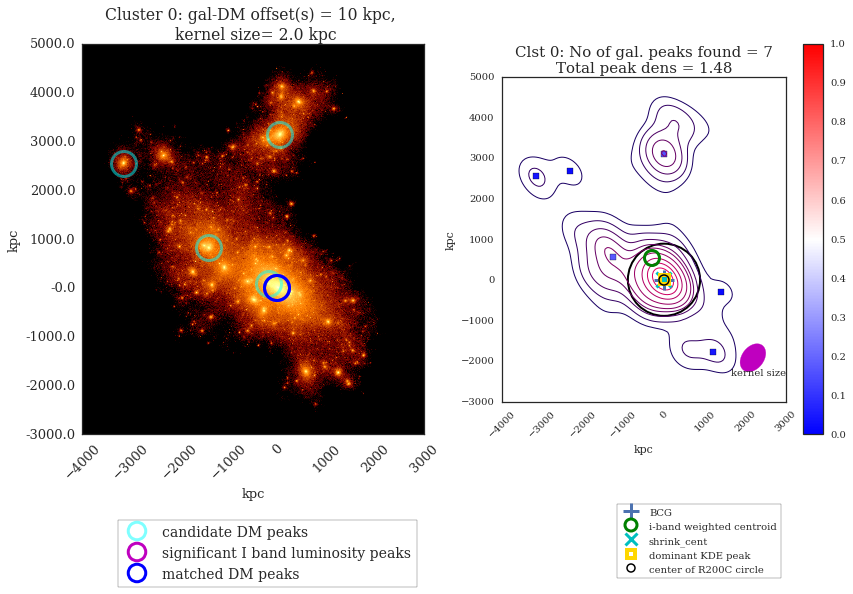

eigval [ 81561.34686132  22712.53656098] 
 eigvec are [[ 0.50499713 -0.86312102]
 [-0.86312102 -0.50499713]]
matrix is [[ 37720.28376779  25650.64506373]
 [ 25650.64506373  66553.59965451]]
width: 571.178945205, height: 301.413580059, angle -59.6688382155
centers =  2143.23158219 -2857.64210959


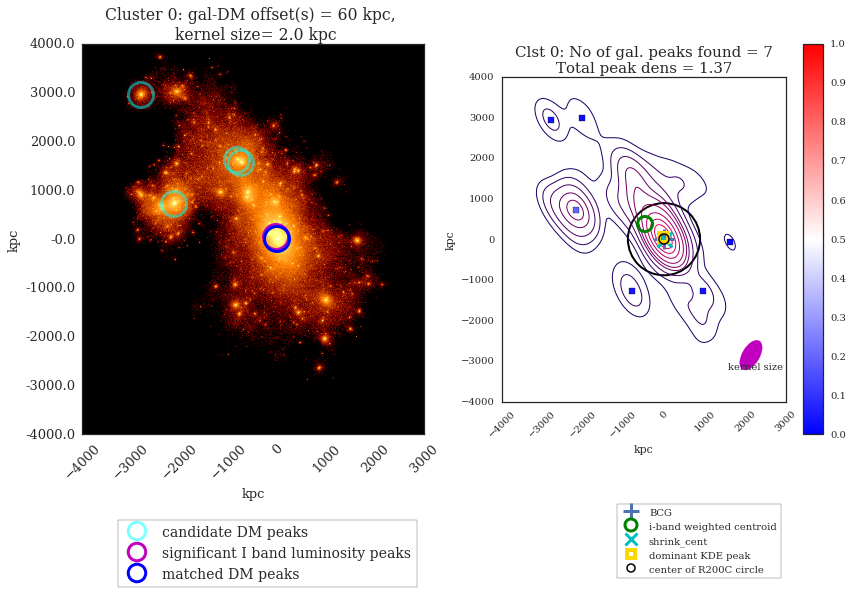

In [149]:
verbose = False
for index in range(len(DM_path_list) / 2)[:3]:
    flip_y = -1.
    fig = plt.figure(figsize=(14, 7))
    ax1 = fig.add_subplot(121, axisbg='black', aspect='equal')
    
    path1 = DM_path_list[2 * index]
    clstNo = path1.split('/')[0]
    DM_clst_dict = DM_fhats[path1]
    
    path3 = '/'.join(path1.split('/')[:-1])
    star_fhat = star_fhats[path3]
    
    ax1, xlims, ylims = plotDM.plot_DM_fhat(
        fhat=DM_clst_dict, fhat_stars=star_fhat, clstNo=clstNo, ax=ax1,
        legend_box_anchor=(1.,-.2), verbose=verbose, log_scale=True,
    )    
    
    ax3 = fig.add_subplot(122, aspect='equal')
    
    plotgal.plot_KDE_peaks(
        star_fhat, allPeaks=True, R200C=R200C[int(clstNo)],
        showData=True, clstNo=clstNo, ax=ax3, fig=fig,
        plotDataPoints=False, save=False, legend_box_anchor=(1, -.3),
        flip_y=flip_y, convert_kpc_over_h_to_kpc=True, xlims=xlims, 
        ylims=ylims
    )

    plt.show()
    plt.close()

# smoother DM plots vs galaxy density plot

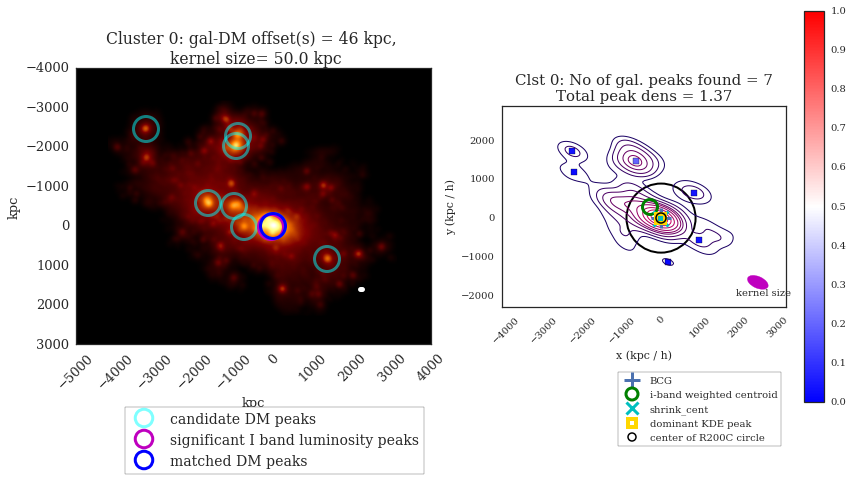

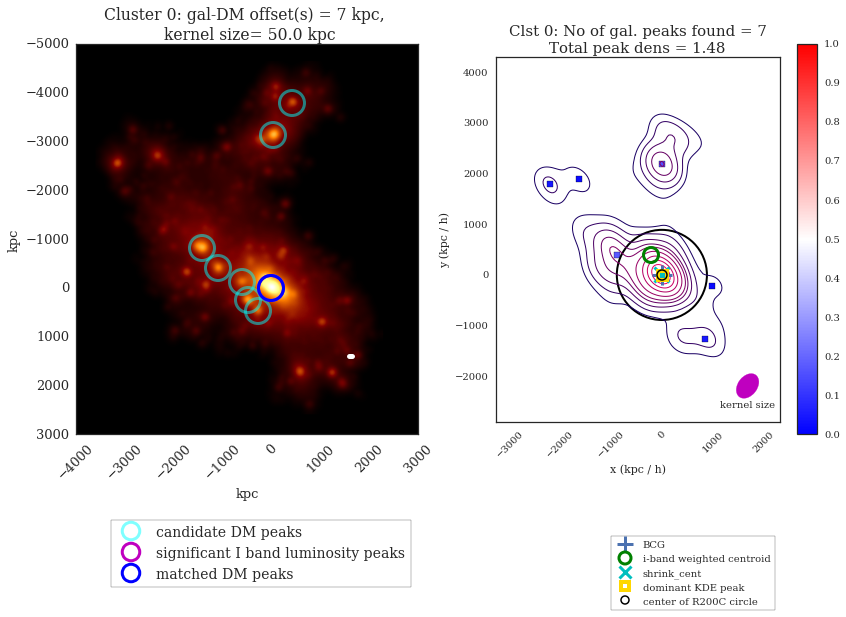

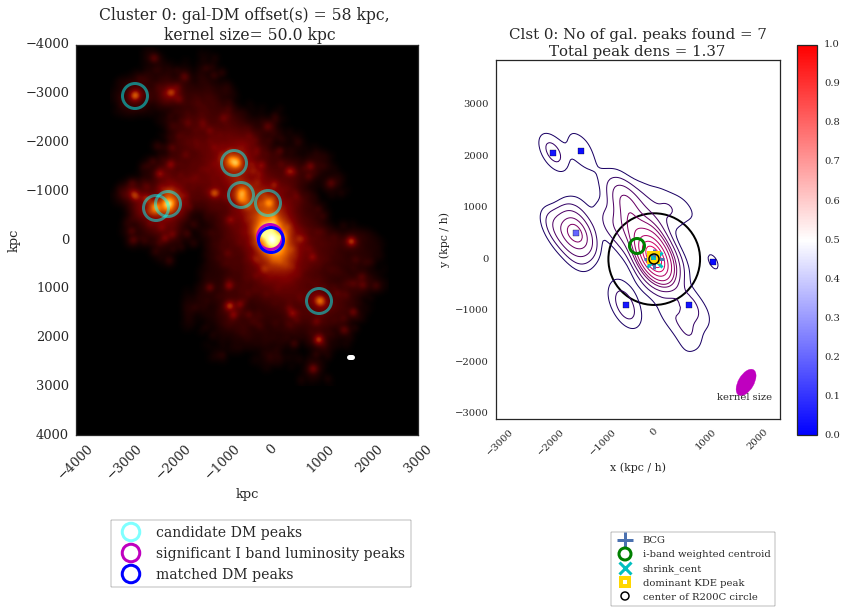

In [90]:
verbose = False
for index in range(len(DM_path_list) / 2)[:3]:
    flip_y = -1.
    fig = plt.figure(figsize=(14, 7))
    
    ax1 = fig.add_subplot(121, axisbg='black', aspect='equal')
    path2 = DM_path_list[2 * index + 1]
    clstNo = path2.split('/')[0]
    kernel_width = float(path2.split('/')[-1])
    
    path3 = '/'.join(path2.split('/')[:-1])
    star_fhat = star_fhats[path3]
    
    DM_clst_dict = DM_fhats[path2]
    plotDM.plot_DM_fhat(
        fhat=DM_clst_dict, fhat_stars=star_fhat, clstNo=clstNo, ax=ax1,
        legend_box_anchor=(1.,-.2), log_scale=False, 
        kernel_width=kernel_width, verbose=verbose
    )
    
    ax3 = fig.add_subplot(122, aspect='equal')
   
    plotgal.plot_KDE_peaks(
        star_fhat, allPeaks=True, R200C=R200C[int(clstNo)],
        showData=True, clstNo=clstNo, ax=ax3, fig=fig,
        plotDataPoints=False, save=False, legend_box_anchor=(1, -.3),
        flip_y=flip_y
    )

    plt.show()
    plt.close()